In [40]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import json
import glob
import os
import numpy as np
from ast import literal_eval
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [2]:
import git
git = git.Git("../../../sonarqube/") 

In [3]:
szz_folder = "../../szz"
csv_folder = "../../csv"

### Import issues

In [4]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

### Import fixversions

In [5]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342


### Import versions

In [6]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head(5)

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import tags

In [7]:
tags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
tags.Date = pd.to_datetime(tags.Date)
tags["month"] = tags.Date.dt.month
tags["year"] = tags.Date.dt.year
tags

,Tag,Sha,Date,Tag_number,month,year
0,latest-silver-master-#65,639ab0ae52d143cf8b8b82c009c95e69ed2d40d7,2015-01-30 10:12:28,latest-silver-master-#65,1,2015
1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020
2,8.4.1.35646,a0d372f704998d38856c26e28662fd7de062f873,2020-07-14 08:13:18,8.4.1.35646,7,2020
3,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,8.4.0.35506,7,2020
4,8.3.1.34397,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2020-05-07 12:09:22,8.3.1.34397,5,2020
...,...,...,...,...,...,...
181,2.10,43f27118331e8395365562c3859986489e38fb0a,2011-08-18 10:56:47,2.10,8,2011
182,2.9,d0d00d0874464b462e07dca0755ad662538395f2,2011-07-17 20:34:06,2.9,7,2011
183,2.8,9b97642bcdbf8060544ab96396da3600dc701e19,2011-05-18 18:30:23,2.8,5,2011
184,2.7,a823384d188516cb00088b6dd7d4ca66a21f5c77,2011-03-31 17:17:07,2.7,3,2011


## Szz Unleashed - Bug issues with Affected Version
* python3 fetch_jira_bugs/fetch.py --issue-code SONAR --jira-project jira.sonarsource.com
* python3 fetch_jira_bugs/git_log_to_array.py --repo-path ../sonarqube --from-commit b326bfd875b0b41
* python3 fetch_jira_bugs/find_bug_fixes.py --gitlog gitlog.json --issue-list issue/ --gitlog-pattern "SONAR-{nbr}"
* java -jar build/libs/szz_find_bug_introducers-0.1.jar -i ../issue_list.json -r ../../sonarqube/

In [8]:
working_folder = "compare_parameters_unleashed/default"

In [9]:
szz_files = glob.glob(f"{szz_folder}/{working_folder}/issues/*.json")
szz_files

['../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_4.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_5.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_2.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_3.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_0.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_1.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_6.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_7.json']

### Bug fixing commits

In [10]:
data = {}
for szz_file in szz_files:
    with open(szz_file, "r") as f:
        data.update(json.load(f))

In [11]:
fields =[ 'creationdate',
 'resolutiondate',
 'commitdate',
 'hash']

In [12]:
tuples = []
for key in data.keys():
    inner_tuple = []
    inner_tuple.append(key)
    for field in fields:
        inner_tuple.append(data[key][field])
    tuples.append(tuple(inner_tuple))
issues_fixing_commit = pd.DataFrame(tuples, columns=["issue_name"]+fields)
issues_fixing_commit

,issue_name,creationdate,resolutiondate,commitdate,hash
0,SONAR-7084,2015-11-26 16:37:15 +0100,2016-05-17 16:42:24 +0200,2015-11-30 16:51:26 +0100,f463897daea037addd0ee5d1a45c046b784e1fc5
1,SONAR-7083,2015-11-26 15:22:13 +0100,2015-11-30 14:01:03 +0100,2015-11-30 11:48:51 +0100,06310fbb1aff7750fa55a4eebd6fc8eada97f95a
2,SONAR-9782,2017-09-01 17:05:07 +0200,2017-10-17 11:33:22 +0200,2017-10-16 10:33:00 +0200,87f55940473777bd4080595a8369a7cf958745c4
3,SONAR-11468,2018-11-12 08:43:21 +0100,2018-12-04 16:05:26 +0100,2018-12-04 16:04:32 +0100,4ecd4bdcbc24f97a2d77aafb6273ce805976baaf
4,SONAR-10258,2018-01-08 16:51:50 +0100,2018-01-10 09:05:57 +0100,2018-01-08 17:52:43 +0100,0b8e4aad2693dbea56400bacd43fd8a4aec72389
...,...,...,...,...,...
500,SONAR-6715,2015-07-15 08:29:57 +0200,2015-07-22 09:54:57 +0200,2015-07-22 11:53:35 +0200,1ef10758eb1c939a60e159758de2603b87ec859d
501,SONAR-6831,2015-09-03 12:09:33 +0200,2015-09-22 15:43:52 +0200,2015-09-28 11:16:29 +0200,d5302c2e5cf81f2794294ae49c1996538b38e8d4
502,SONAR-6995,2015-11-04 15:23:53 +0100,2015-12-04 11:30:34 +0100,2015-12-03 12:29:24 +0100,e5f5ca562f10727eead9e0de8fe1a090dea8399d
503,SONAR-6632,2015-06-09 21:51:26 +0200,2016-05-16 14:41:20 +0200,2016-05-16 12:12:25 +0200,23ee784e6d44f8462c8d160c7a113a64424bfb67


### Bug inducing commits

In [13]:
szz_inducing_folders = list(filter(lambda path: True if os.path.isdir(path) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))
szz_inducing_files = list(filter(lambda path: True if (os.path.isfile(path) and ("fix_and_introducers_pairs" in path)) else False, glob.glob(f"{szz_folder}/{working_folder}/results/*")))

In [14]:
szz_inducing_files + szz_inducing_folders

['../../szz/compare_parameters_unleashed/default/results/fix_and_introducers_pairs.json',
 '../../szz/compare_parameters_unleashed/default/results/result2',
 '../../szz/compare_parameters_unleashed/default/results/result5',
 '../../szz/compare_parameters_unleashed/default/results/result4',
 '../../szz/compare_parameters_unleashed/default/results/result3',
 '../../szz/compare_parameters_unleashed/default/results/result6',
 '../../szz/compare_parameters_unleashed/default/results/result1',
 '../../szz/compare_parameters_unleashed/default/results/result0',
 '../../szz/compare_parameters_unleashed/default/results/result7']

In [15]:
fix_and_introducers_pairs = []

for file in szz_inducing_files:
    with open(file, "r") as f:
        fix_and_introducers_pairs.append(json.load(f))

for folder in szz_inducing_folders:
    with open(f"{folder}/fix_and_introducers_pairs.json", "r") as f:
        fix_and_introducers_pairs.append(json.load(f))

In [16]:
fix_and_introducers_pairs

[[['100653f76e52f1555ce9424924031acdeb941888',
   '950454051f247863735b75d251bee8460c7e07be'],
  ['100653f76e52f1555ce9424924031acdeb941888',
   '6bc55b17ebd87802cb9b55d5b6625e1a935f3909'],
  ['100653f76e52f1555ce9424924031acdeb941888',
   '5b947f0d78f4a63b916b10e626d29398830e5da3'],
  ['100653f76e52f1555ce9424924031acdeb941888',
   '950454051f247863735b75d251bee8460c7e07be'],
  ['100653f76e52f1555ce9424924031acdeb941888',
   '6bc55b17ebd87802cb9b55d5b6625e1a935f3909'],
  ['100653f76e52f1555ce9424924031acdeb941888',
   '5b947f0d78f4a63b916b10e626d29398830e5da3'],
  ['34fece43c543cd2d3cd8e76a9af188f12cf69c39',
   'fb218304c322c3e055d8450690f6ae3b2aad45cc'],
  ['34fece43c543cd2d3cd8e76a9af188f12cf69c39',
   'f6a1da456075b5307537c9f736eecb656c5d3a2d'],
  ['34fece43c543cd2d3cd8e76a9af188f12cf69c39',
   '7498e17be42112648345e20825ad84e6760b849b'],
  ['34fece43c543cd2d3cd8e76a9af188f12cf69c39',
   'a90a7eb2d9e00966a3bb46ba73e3214989283946'],
  ['34fece43c543cd2d3cd8e76a9af188f12cf69c39',
   

In [17]:
fix_and_introducers_pairs_tuples = []
for pair_list in fix_and_introducers_pairs:
    for pair in pair_list:
        fix_and_introducers_pairs_tuples.append((pair[0], pair[1]))
fix_and_introducers = pd.DataFrame(fix_and_introducers_pairs_tuples, columns=["fixing_commit", "inducing_commit"])

In [18]:
fix_and_introducers

,fixing_commit,inducing_commit
0,100653f76e52f1555ce9424924031acdeb941888,950454051f247863735b75d251bee8460c7e07be
1,100653f76e52f1555ce9424924031acdeb941888,6bc55b17ebd87802cb9b55d5b6625e1a935f3909
2,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3
3,100653f76e52f1555ce9424924031acdeb941888,950454051f247863735b75d251bee8460c7e07be
4,100653f76e52f1555ce9424924031acdeb941888,6bc55b17ebd87802cb9b55d5b6625e1a935f3909
...,...,...
29995,c83b447f68dd01cfd44641356bd0f2ad25507877,d5302c2e5cf81f2794294ae49c1996538b38e8d4
29996,c83b447f68dd01cfd44641356bd0f2ad25507877,d5302c2e5cf81f2794294ae49c1996538b38e8d4
29997,c83b447f68dd01cfd44641356bd0f2ad25507877,d5302c2e5cf81f2794294ae49c1996538b38e8d4
29998,c83b447f68dd01cfd44641356bd0f2ad25507877,d5302c2e5cf81f2794294ae49c1996538b38e8d4


**Remove duplicates**

In [19]:
fix_and_introducers.groupby(["fixing_commit", "inducing_commit"], as_index=False).size()

,fixing_commit,inducing_commit,size
0,00056ffb7e4bb18ad4ce36b98d2671fd3902fad3,08be68fda3cfd859ab412bfa634409d211f79927,4
1,00056ffb7e4bb18ad4ce36b98d2671fd3902fad3,4ecb6fc3ec08ee37a1bb5c19d8ca44e2b832b5a7,4
2,00056ffb7e4bb18ad4ce36b98d2671fd3902fad3,793e86fce66f356099792b7231c9a1d949ff875e,4
3,00056ffb7e4bb18ad4ce36b98d2671fd3902fad3,7983068e4d2a45531ba0942688e659adf9ee61a2,8
4,00056ffb7e4bb18ad4ce36b98d2671fd3902fad3,d5b076b2fc8988e9a3799ba7775f851e1a12cbb7,4
...,...,...,...
4680,ff20b3c6df653a9e57b80735c7084b8f38373d7d,f1336d0ec3232a4226adb6864e57a9bd3d9932ce,8
4681,ff20b3c6df653a9e57b80735c7084b8f38373d7d,f45419ceada830ea3fd17c3a1c2986ea696066a8,4
4682,ff20b3c6df653a9e57b80735c7084b8f38373d7d,f76df3e934c7b76141c58f24ac3303ae358cdcf4,8
4683,ff20b3c6df653a9e57b80735c7084b8f38373d7d,f82422a62e3ca42f589b9e8759f85befc0ed5181,4


In [20]:
fix_and_introducers = fix_and_introducers.drop_duplicates(subset=["fixing_commit", "inducing_commit"], keep="first")
fix_and_introducers.shape

(4685, 2)

**Distribution of number of inducing commits per bug**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inducing_commit'>

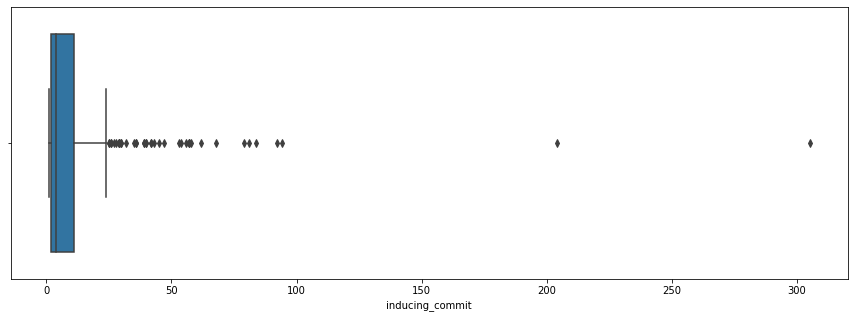

In [21]:
sns.boxplot(fix_and_introducers.groupby("fixing_commit").inducing_commit.count())

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inducing_commit', ylabel='Density'>

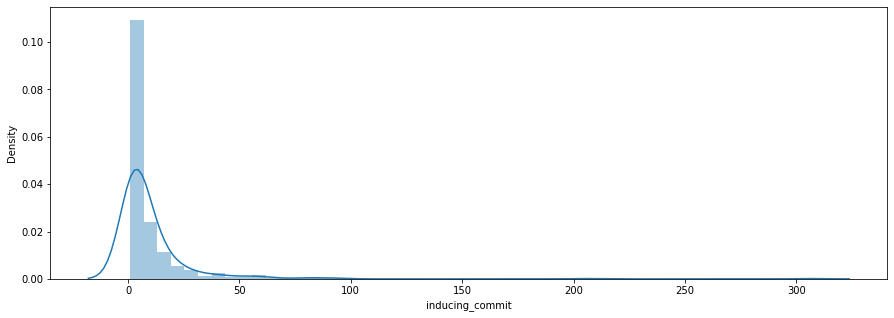

In [22]:
sns.distplot(fix_and_introducers.groupby("fixing_commit").inducing_commit.count().sort_values())

**Percentage of bugs for which we have inducing commits out of the ones with a fixing commits**

In [24]:
len(set(issues_fixing_commit.hash).intersection(set(fix_and_introducers.fixing_commit))) / len(issues_fixing_commit.hash)

0.8950495049504951

In [ ]:
def find_first_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    if len(tags) > 0:
        return tags[0]
    return None

def all_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    return tags

def find_all_tags_for_df(df, newColumn, func, field):
    cache = {}
    df[newColumn] = np.nan
    for i, row in df.iterrows():
        if(not row[field] in cache):
            cache[row[field]] = func(row[field])
        else:
            row[newColumn] = cache[row[field]]
        if(i%100 == 0):
            print(i)
            print(cache)

In [39]:
from pandarallel import pandarallel
pandarallel.initialize()
#fix_and_introducers["all_affected_tags_fixing"] = fix_and_introducers.fixing_commit.parallel_apply(lambda sha: all_tag_contains_commit(sha))
#fix_and_introducers["all_affected_tags_inducing"] = fix_and_introducers.inducing_commit.apply(lambda sha: all_tag_contains_commit(sha))

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


<ipython-input-39-52a4421df4a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_and_introducers["all_affected_tags_inducing"] = fix_and_introducers.inducing_commit.apply(lambda sha: all_tag_contains_commit(sha))


In [41]:
fix_and_introducers

,fixing_commit,inducing_commit,all_affected_tags_fixing,all_affected_tags_inducing
0,100653f76e52f1555ce9424924031acdeb941888,950454051f247863735b75d251bee8460c7e07be,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-..."
1,100653f76e52f1555ce9424924031acdeb941888,6bc55b17ebd87802cb9b55d5b6625e1a935f3909,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-..."
2,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,..."
6,34fece43c543cd2d3cd8e76a9af188f12cf69c39,fb218304c322c3e055d8450690f6ae3b2aad45cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.0, 6.0-RC1, 6.0-RC2, 6.1, 6.1-RC1, 6.1-RC2,..."
7,34fece43c543cd2d3cd8e76a9af188f12cf69c39,f6a1da456075b5307537c9f736eecb656c5d3a2d,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[3.0, 3.0.1, 3.1, 3.1.1, 3.2, 3.2.1, 3.3, 3.3...."
...,...,...,...,...
14938,7a230c2fa98532eb79d2efcd30c31d608f9fa108,fe716c6dc43d4d7acb437136b1c87902e8ff0bc4,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.4, 6.4-RC1, 6.4-RC2, 6.4-RC3, 6.5, 6.5-M1, ..."
14939,7a230c2fa98532eb79d2efcd30c31d608f9fa108,90306cb436e4fadceda6c106adc407618674f0d0,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.6, 6.6-RC1, 6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7..."
14940,7a230c2fa98532eb79d2efcd30c31d608f9fa108,a76cf43f5fa4ae6c609fda4186a8fcad0a8e1bfa,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5.3-RC1,..."
14942,7a230c2fa98532eb79d2efcd30c31d608f9fa108,5fac9ad9ac653dba89f5f53457c8d17959cef7cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.1, 6.1-RC1, 6.1-RC2, 6.1.1, 6.2, 6.2-RC1, 6..."


In [42]:
fix_and_introducers["first_fixing_tag"] = fix_and_introducers.all_affected_tags_fixing.apply(lambda tags: tags[0])
fix_and_introducers["first_inducing_tag"] = fix_and_introducers.all_affected_tags_inducing.apply(lambda tags: tags[0])

<ipython-input-42-5d16b07e6b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_and_introducers["first_fixing_tag"] = fix_and_introducers.all_affected_tags_fixing.apply(lambda tags: tags[0])
<ipython-input-42-5d16b07e6b4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_and_introducers["first_inducing_tag"] = fix_and_introducers.all_affected_tags_inducing.apply(lambda tags: tags[0])


In [43]:
fix_and_introducers

,fixing_commit,inducing_commit,all_affected_tags_fixing,all_affected_tags_inducing,first_fixing_tag,first_inducing_tag
0,100653f76e52f1555ce9424924031acdeb941888,950454051f247863735b75d251bee8460c7e07be,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-...",7.5,5.5
1,100653f76e52f1555ce9424924031acdeb941888,6bc55b17ebd87802cb9b55d5b6625e1a935f3909,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-...",7.5,5.5
2,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,7.5
6,34fece43c543cd2d3cd8e76a9af188f12cf69c39,fb218304c322c3e055d8450690f6ae3b2aad45cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.0, 6.0-RC1, 6.0-RC2, 6.1, 6.1-RC1, 6.1-RC2,...",6.7,6.0
7,34fece43c543cd2d3cd8e76a9af188f12cf69c39,f6a1da456075b5307537c9f736eecb656c5d3a2d,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[3.0, 3.0.1, 3.1, 3.1.1, 3.2, 3.2.1, 3.3, 3.3....",6.7,3.0
...,...,...,...,...,...,...
14938,7a230c2fa98532eb79d2efcd30c31d608f9fa108,fe716c6dc43d4d7acb437136b1c87902e8ff0bc4,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.4, 6.4-RC1, 6.4-RC2, 6.4-RC3, 6.5, 6.5-M1, ...",6.7,6.4
14939,7a230c2fa98532eb79d2efcd30c31d608f9fa108,90306cb436e4fadceda6c106adc407618674f0d0,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.6, 6.6-RC1, 6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7...",6.7,6.6
14940,7a230c2fa98532eb79d2efcd30c31d608f9fa108,a76cf43f5fa4ae6c609fda4186a8fcad0a8e1bfa,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5.3-RC1,...",6.7,5.2
14942,7a230c2fa98532eb79d2efcd30c31d608f9fa108,5fac9ad9ac653dba89f5f53457c8d17959cef7cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.1, 6.1-RC1, 6.1-RC2, 6.1.1, 6.2, 6.2-RC1, 6...",6.7,6.1


### Run from here to avoid recreation of DataFrames

In [47]:
#fix_and_introducers.to_csv(f"{csv_folder}/fix_and_introducers_default.csv")
fix_and_introducers = pd.read_csv(f"{csv_folder}/fix_and_introducers_default.csv", index_col=0)
fix_and_introducers['all_affected_tags_fixing'] = fix_and_introducers['all_affected_tags_fixing'].apply(lambda x: literal_eval(x))
fix_and_introducers['all_affected_tags_inducing'] = fix_and_introducers['all_affected_tags_inducing'].apply(lambda x: literal_eval(x))
fix_and_introducers

,fixing_commit,inducing_commit,all_affected_tags_fixing,all_affected_tags_inducing,first_fixing_tag,first_inducing_tag
0,100653f76e52f1555ce9424924031acdeb941888,950454051f247863735b75d251bee8460c7e07be,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-...",7.5,5.5
1,100653f76e52f1555ce9424924031acdeb941888,6bc55b17ebd87802cb9b55d5b6625e1a935f3909,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-...",7.5,5.5
2,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,7.5
6,34fece43c543cd2d3cd8e76a9af188f12cf69c39,fb218304c322c3e055d8450690f6ae3b2aad45cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.0, 6.0-RC1, 6.0-RC2, 6.1, 6.1-RC1, 6.1-RC2,...",6.7,6.0
7,34fece43c543cd2d3cd8e76a9af188f12cf69c39,f6a1da456075b5307537c9f736eecb656c5d3a2d,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[3.0, 3.0.1, 3.1, 3.1.1, 3.2, 3.2.1, 3.3, 3.3....",6.7,3.0
...,...,...,...,...,...,...
14938,7a230c2fa98532eb79d2efcd30c31d608f9fa108,fe716c6dc43d4d7acb437136b1c87902e8ff0bc4,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.4, 6.4-RC1, 6.4-RC2, 6.4-RC3, 6.5, 6.5-M1, ...",6.7,6.4
14939,7a230c2fa98532eb79d2efcd30c31d608f9fa108,90306cb436e4fadceda6c106adc407618674f0d0,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.6, 6.6-RC1, 6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7...",6.7,6.6
14940,7a230c2fa98532eb79d2efcd30c31d608f9fa108,a76cf43f5fa4ae6c609fda4186a8fcad0a8e1bfa,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5.3-RC1,...",6.7,5.2
14942,7a230c2fa98532eb79d2efcd30c31d608f9fa108,5fac9ad9ac653dba89f5f53457c8d17959cef7cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.1, 6.1-RC1, 6.1-RC2, 6.1.1, 6.2, 6.2-RC1, 6...",6.7,6.1


In [52]:
fix_and_introducers.isna().sum()

fixing_commit                  0
inducing_commit                0
all_affected_tags_fixing       0
all_affected_tags_inducing     0
first_fixing_tag              30
first_inducing_tag             0
dtype: int64

In [50]:
fix_and_introducers[fix_and_introducers.first_fixing_tag.isna()].fixing_commit.unique()

array(['7c6f52df2e18da76180d74b3533e709f5b47309a'], dtype=object)

We were able to find a first tag containing the commit for both inducing and fixing commits except for:
* Fixing commit 7c6f52df2e18da76180d74b3533e709f5b47309a

#### Do fixing bugs and inducing bug appear in the same tag for the first time?
This could explain why they were not tagged with any affected versions on Jira

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

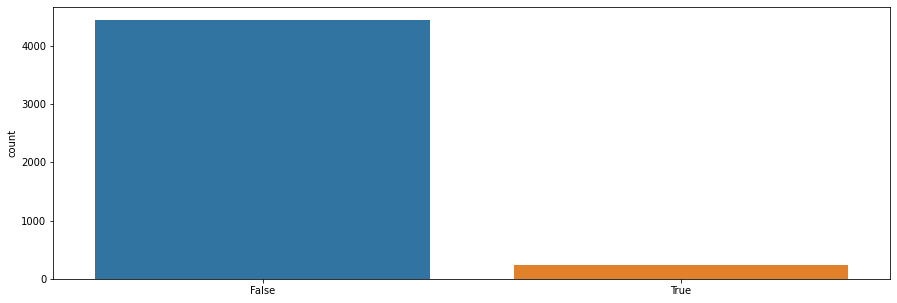

In [53]:
sns.countplot(fix_and_introducers.first_fixing_tag == fix_and_introducers.first_inducing_tag)

### Merging all datasets

In [155]:
fixversions = fixversions.merge(issues[["issue_key", "issue_id"]])

1    0.884434
2    0.114151
3    0.001415
Name: fixVersion_id, dtype: float64

In [67]:
fixversions_list = fixversions.groupby(["issue_id", "issue_key"]).fixVersion_name.apply(list).reset_index()
fixversions_list = fixversions_list.rename(columns={"fixVersion_name":"fixVersions"})
fixversions_list

,issue_id,issue_key,fixVersions
0,26987,SONAR-6332,[5.2]
1,26991,SONAR-6325,[5.2]
2,27567,SONAR-6345,[5.2]
3,27726,SONAR-6347,[5.2]
4,27849,SONAR-6339,[5.2]
...,...,...,...
4235,97773,SONAR-13900,[8.5]
4236,97786,SONAR-13903,[8.6]
4237,97855,SONAR-13907,[8.5]
4238,97858,SONAR-13909,[8.5]


In [84]:
merge = fixversions_list.merge(issues_fixing_commit, left_on="issue_key", right_on="issue_name")
fix_and_versions = fix_and_introducers[fix_and_introducers.index.isin(fix_and_introducers[["fixing_commit", "first_fixing_tag"]].drop_duplicates().index)]
merge = merge.merge(fix_and_versions[["fixing_commit", "all_affected_tags_fixing", "first_fixing_tag"]], left_on="hash", right_on="fixing_commit")
merge

,issue_id,issue_key,fixVersions,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,all_affected_tags_fixing,first_fixing_tag
0,29665,SONAR-6351,"[5.1.2, 5.2]",SONAR-6351,2015-03-30 07:14:00 +0200,2015-07-15 13:05:36 +0200,2015-07-15 15:01:21 +0200,05087385ee6a3e032febe5f5f3033aa13a534147,05087385ee6a3e032febe5f5f3033aa13a534147,"[5.1.2, 5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5...",5.1.2
1,40116,SONAR-6685,"[5.1.2, 5.2]",SONAR-6685,2015-07-01 07:27:06 +0200,2015-07-15 13:05:48 +0200,2015-07-15 15:01:21 +0200,05087385ee6a3e032febe5f5f3033aa13a534147,05087385ee6a3e032febe5f5f3033aa13a534147,"[5.1.2, 5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5...",5.1.2
2,29701,SONAR-6335,[5.1],SONAR-6335,2015-03-24 06:21:51 +0100,2015-03-24 09:00:46 +0100,2015-03-24 12:34:43 +0100,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,"[5.1, 5.1.1, 5.1.2, 5.2, 5.2-RC1, 5.2-RC2, 5.2...",5.1
3,29703,SONAR-6386,[5.2],SONAR-6386,2015-04-01 07:32:37 +0200,2015-10-07 11:43:05 +0200,2015-10-05 10:20:02 +0200,2205d5242d2d2ebb579f4a20c7c2dc1a17fbe1a8,2205d5242d2d2ebb579f4a20c7c2dc1a17fbe1a8,"[5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5.3-RC1,...",5.2
4,29731,SONAR-6348,"[4.5.5, 5.2]",SONAR-6348,2015-03-27 04:50:25 +0100,2015-04-15 09:07:05 +0200,2015-04-03 15:19:04 +0200,09c5d20c6c86d544c5a5a2448fe553b95f3cba2d,09c5d20c6c86d544c5a5a2448fe553b95f3cba2d,"[5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5.3-RC1,...",5.2
...,...,...,...,...,...,...,...,...,...,...,...
445,96774,SONAR-13773,[8.5],SONAR-13773,2020-08-18 16:22:36 +0200,2020-09-09 15:53:57 +0200,2020-09-07 18:28:35 +0200,6885b465d9fffa09f8c03b03ebd792f8669f9685,6885b465d9fffa09f8c03b03ebd792f8669f9685,[8.5.0.37579],8.5.0.37579
446,96862,SONAR-13786,[8.5],SONAR-13786,2020-08-20 16:07:20 +0200,2020-08-27 18:04:51 +0200,2020-08-24 14:13:54 +0200,49ee415f4a13e435f5d86a125666532b8fb029a9,49ee415f4a13e435f5d86a125666532b8fb029a9,[8.5.0.37579],8.5.0.37579
447,96887,SONAR-13790,[8.5],SONAR-13790,2020-08-21 15:44:15 +0200,2020-09-02 10:29:38 +0200,2020-08-24 15:08:25 +0200,6fd40a8af54818efb8c29c8a01102121a529099e,6fd40a8af54818efb8c29c8a01102121a529099e,[8.5.0.37579],8.5.0.37579
448,96934,SONAR-13802,[8.5],SONAR-13802,2020-08-25 09:34:30 +0200,2020-08-26 15:01:13 +0200,2020-08-26 10:16:58 +0200,2e95a6d9729ad591ef16c950453529a704d534db,2e95a6d9729ad591ef16c950453529a704d534db,[8.5.0.37579],8.5.0.37579


**Uniform versions from Jira to Github**

In [110]:
map_versions = {"8.5.0.37579": "8.5",
               "8.4.0.35506": "8.4",
               "8.3.0.34182": "8.3",
               "8.2.0.32929": "8.2",
               "8.1.0.31237": "8.1"}

In [111]:
def replace_versions(tags):
    for i, tag in enumerate(tags):
       if(tag in map_versions):
        tags[i] = map_versions[tag]
    return tags
merge.all_affected_tags_fixing = merge.all_affected_tags_fixing.apply(replace_versions)

**How many fixVersion does an issue have?**

In [156]:
merge.fixVersions.apply(lambda x: len(x)).value_counts(normalize=True)

1    0.748889
2    0.244444
3    0.006667
Name: fixVersions, dtype: float64

In [113]:
merge.fixVersions.apply(lambda x: len(x)).value_counts(normalize=True)

1    0.748889
2    0.244444
3    0.006667
Name: fixVersions, dtype: float64

**Confirm the presence of 3 issues with 3 fix versions**

In [114]:
merge[merge.fixVersions.apply(lambda x: len(x))>2]

,issue_id,issue_key,fixVersions,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,all_affected_tags_fixing,first_fixing_tag,intersection_fixVersions_tags
155,54735,SONAR-8421,"[5.6.4, 6.2, 6.3]",SONAR-8421,2016-11-22 16:13:17 +0100,2016-12-01 12:28:47 +0100,2016-11-30 16:26:22 +0100,9eebecd84d86c76ea513afc0e50573516c6731b8,9eebecd84d86c76ea513afc0e50573516c6731b8,"[5.6.4, 5.6.5, 5.6.6, 5.6.7, 6.2, 6.2-RC2, 6.2...",5.6.4,3
156,54946,SONAR-8447,"[5.6.4, 6.2, 6.3]",SONAR-8447,2016-11-29 10:18:06 +0100,2016-12-06 13:36:26 +0100,2016-12-05 17:33:36 +0100,46dc0f0590c60abfe479c95f17f11b552ad070a9,46dc0f0590c60abfe479c95f17f11b552ad070a9,"[5.6.4, 5.6.5, 5.6.6, 5.6.7, 6.2, 6.2-RC3, 6.2...",5.6.4,3
223,64192,SONAR-9734,"[5.6.7, 6.6-M1, 6.6]",SONAR-9734,2017-08-18 13:55:50 +0200,2017-08-21 21:53:50 +0200,2017-08-18 22:46:59 +0200,d4380ccc8fe7783b1b04148c3707e0e93b3bb98e,d4380ccc8fe7783b1b04148c3707e0e93b3bb98e,"[6.6, 6.6-RC1, 6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7...",6.6,1


**How many issues have their fixVersion among the predicted ones by SZZ?**

In [115]:
merge["intersection_fixVersions_tags"] = merge.apply(lambda row: len(set(row.fixVersions).intersection(row.all_affected_tags_fixing)), axis=1)

In [157]:
merge.intersection_fixVersions_tags.value_counts(normalize=True).sort_index()

0    0.186667
1    0.708889
2    0.100000
3    0.004444
Name: intersection_fixVersions_tags, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='intersection_fixVersions_tags', ylabel='count'>

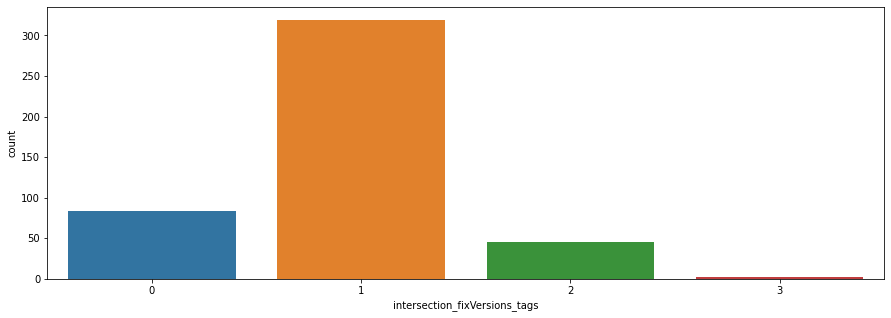

In [116]:
sns.countplot(merge.intersection_fixVersions_tags)

**How many issue have a full match between fixVersions and SZZ versions?**

In [124]:
merge["full_intersection"] = merge.apply(lambda row: row.intersection_fixVersions_tags == len(row.fixVersions), axis=1)

In [130]:
merge.full_intersection.value_counts(normalize=True).sort_index()

False    0.304444
True     0.695556
Name: full_intersection, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='intersection_ratio', ylabel='count'>

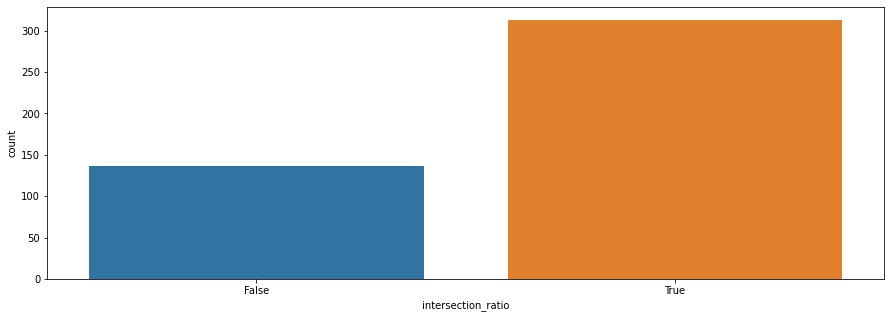

In [120]:
sns.countplot(merge.intersection_ratio)

**What is the ratio between the intersection and the number of reported fixVersions on Jira?**

In [125]:
merge["intersection_ratio"] = merge.apply(lambda row: row.intersection_fixVersions_tags / len(row.fixVersions), axis=1)

In [129]:
merge.intersection_ratio.value_counts(normalize=True).sort_index()

0.000000    0.186667
0.333333    0.002222
0.500000    0.115556
1.000000    0.695556
Name: intersection_ratio, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='intersection_ratio', ylabel='count'>

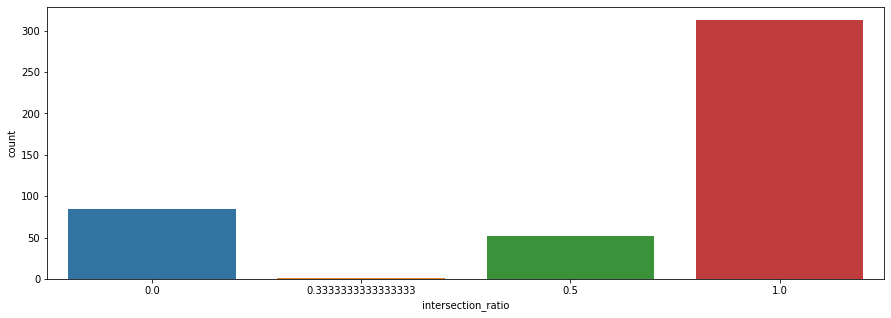

In [127]:
sns.countplot(merge.intersection_ratio)

**Investigating issue for which there is zero intersection**

In [131]:
no_intersection_issues = merge[merge.intersection_fixVersions_tags == 0]
no_intersection_issues

,issue_id,issue_key,fixVersions,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,all_affected_tags_fixing,first_fixing_tag,intersection_fixVersions_tags,intersection_ratio,full_intersection
29,42015,SONAR-6846,[5.6],SONAR-6846,2015-09-11 09:24:53 +0200,2016-05-13 13:29:23 +0200,2016-08-18 18:27:47 +0200,e0c834ebf18b722009ae5940e98b5916c8bbea71,e0c834ebf18b722009ae5940e98b5916c8bbea71,"[5.6.2, 5.6.3, 5.6.4, 5.6.5, 5.6.6, 5.6.7, 6.1...",5.6.2,0,0.0,False
95,48097,SONAR-7540,[5.5],SONAR-7540,2016-04-08 16:34:35 +0200,2016-04-11 16:00:49 +0200,2016-04-08 18:10:28 +0200,c8b01d4f1520a14be831547f6b35c072a8b9517e,c8b01d4f1520a14be831547f6b35c072a8b9517e,"[5.6, 5.6-RC1, 5.6-RC2, 5.6.1, 5.6.2, 5.6.3, 5...",5.6,0,0.0,False
97,48313,SONAR-7560,[5.5],SONAR-7560,2016-04-19 17:40:02 +0200,2016-05-18 08:20:52 +0200,2016-07-13 16:32:26 +0200,48191a7dd1e630ac53f73418852fc7ea6edd2545,48191a7dd1e630ac53f73418852fc7ea6edd2545,"[5.6.1, 5.6.2, 5.6.3, 5.6.4, 5.6.5, 5.6.6, 5.6...",5.6.1,0,0.0,False
99,48661,SONAR-7578,[5.6],SONAR-7578,2016-04-29 18:01:22 +0200,2016-05-19 12:51:35 +0200,2016-09-05 22:20:34 +0200,ebc43c59ac25a3c75b9ce089f90e9eaac6c74637,ebc43c59ac25a3c75b9ce089f90e9eaac6c74637,"[6.1, 6.1-RC1, 6.1-RC2, 6.1.1, 6.2, 6.2-RC1, 6...",6.1,0,0.0,False
174,58316,SONAR-8883,[6.3],SONAR-8883,2017-03-02 11:17:58 +0100,2017-03-02 16:25:54 +0100,2017-03-03 10:38:06 +0100,d9a8adec352374814382395b87fd034b0d5ab176,d9a8adec352374814382395b87fd034b0d5ab176,"[6.4, 6.4-RC1, 6.4-RC2, 6.4-RC3, 6.5, 6.5-M1, ...",6.4,0,0.0,False
203,61798,SONAR-9384,[7.2],SONAR-9384,2017-06-06 16:45:35 +0200,2018-05-01 08:35:47 +0200,2018-04-16 18:06:08 +0200,d13e2d9a08ea6fc3cb29bcf4add0c4f2f12cc3b8,d13e2d9a08ea6fc3cb29bcf4add0c4f2f12cc3b8,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,0,0.0,False
247,66560,SONAR-10053,[7.1],SONAR-10053,2017-11-09 12:11:47 +0100,2018-02-23 15:27:55 +0100,2018-02-22 17:35:02 +0100,2c7c8d8b0c1575f7e2235f5a7868d70bf914f3ba,2c7c8d8b0c1575f7e2235f5a7868d70bf914f3ba,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,0,0.0,False
254,66864,SONAR-10077,[7.2],SONAR-10077,2017-11-20 13:55:08 +0100,2018-05-24 09:49:51 +0200,2018-05-08 11:30:10 +0200,899d9a0a07566b55a2de2434266e4daeb4a65666,899d9a0a07566b55a2de2434266e4daeb4a65666,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,0,0.0,False
256,67051,SONAR-10122,[7.1],SONAR-10122,2017-11-24 10:26:47 +0100,2018-02-02 13:51:10 +0100,2018-01-09 18:07:19 +0100,0d7956367e37a47c21cb05a52b118b38a2c17b66,0d7956367e37a47c21cb05a52b118b38a2c17b66,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,0,0.0,False
270,68128,SONAR-10252,[7.2],SONAR-10252,2018-01-05 16:52:27 +0100,2018-05-01 15:08:50 +0200,2018-04-30 15:12:58 +0200,5c78e445609eaf1c6bb00b0c863623ea497237a0,5c78e445609eaf1c6bb00b0c863623ea497237a0,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,0,0.0,False


In [158]:
data = []
for index, row in no_intersection_issues.iterrows():
    for i, commit in enumerate(git.log("--pretty=oneline", "--abbrev-commit", f"--grep={row.issue_key}").split("\n")):
        sha = commit.split(" ")[0]
        tags = all_tag_contains_commit(sha)
        tags = replace_versions(tags)
        if len(set(row.fixVersions).intersection(tags)) > 0:
            data.append((row.issue_key, i+1))
            continue
        data.append((row.issue_key, 0, len(tags)))

In [159]:
n_commit_with_fixversion_match = pd.DataFrame(data, columns=["issue_key", "n_commit_first_match", "n_of_commit_with_issue_name"])

In [160]:
n_commit_with_fixversion_match.n_commit_first_match.value_counts(normalize=True)

0    0.929204
2    0.035398
3    0.017699
9    0.008850
8    0.008850
Name: n_commit_first_match, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_commit_first_match', ylabel='count'>

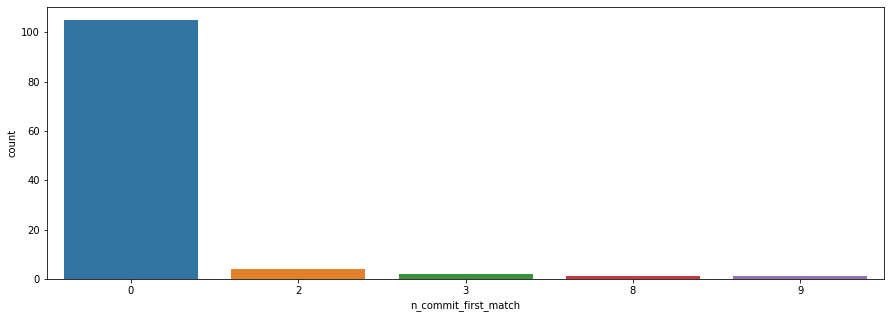

In [161]:
sns.countplot(n_commit_with_fixversion_match.n_commit_first_match)

**Inaccurate Jira fixVersions: commits with the issue name but not matching the versions**

In [165]:
y = n_commit_with_fixversion_match
len(y[(y.n_commit_first_match == 0) & (y.n_of_commit_with_issue_name > 0)]) / len(y)

0.9292035398230089

We are working with 450 issues which is the 85% of the total which SZZ retrieved by Jira using the mentioned query. The distribution of number of fixVersions per issue shows that 75% of issues have only one fixVersion, 24% have 2 and only 0.006% have 3 fixVersions.

* 80% of the fixVersions intersect with 1 or more versions with the ones retrieved by SZZ.
* 69% of the issues have all the fixVersions in the ones from SZZ
* 80% of the issues have at least half of the reported fixVersions in the ones from SZZ

We investigated the 20% which does not intersect the SZZ ones: we queried git history for commits with the issue name in the message. For each commit, we retrieved the list of tags containing that commit and intersected it with the reported versions from Jira. For each issue we stored how many commits, out of the ones retrieved using the issue name, in the past we had to go for finding a not empty intersection. This way we replicated the procedure followed by SZZ but did not stop at the most recent one. The reason is that in some cases bugs are fixed with a specific commit, and a minor addition/refactor is performed later referencing the original issue.
* 92% could not find any commit giving an intersection
* 0.03 found the second commit to giving an intersection
This shows that the algorithm is effective in most of the cases and when it fails, it is usually because the information on Jira does not match the one on Github.
In all the 92% of the cases with no intersection, commits referencing the issue could be found. This can hint at the information on Jira not being accurate: the fixversion mentioned on Jira does not correspond to any of the tag containing any of the commits referencing the issue.


### Investigating issues for which no bug-fixing commit was found

Load the originally downloaded issues by SZZ

In [173]:
issues_files = glob.glob(f"{szz_folder}/{working_folder}/../issues/*")
issues_files

['../../szz/compare_parameters_unleashed/default/../issues/res0.json']

In [174]:
data = {}
for issues_file in issues_files:
    with open(issues_file, "r") as f:
        data.update(json.load(f))

In [175]:
tuples = []
for issue in data["issues"]:
    print(issue)
    tuples.append((issue["id"], issue["key"]))
starting_issues = pd.DataFrame(tuples, columns=["issue_id", "issue_name"])
starting_issues

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,issue_id,issue_name
0,97773,SONAR-13900
1,96944,SONAR-13809
2,96934,SONAR-13802
3,96887,SONAR-13790
4,96862,SONAR-13786
...,...,...
586,29665,SONAR-6351
587,29731,SONAR-6348
588,27863,SONAR-6340
589,27851,SONAR-6336


In [176]:
issues_no_fixing_bug = starting_issues[~starting_issues.issue_name.isin(issues_fixing_commit.issue_name)]
issues_no_fixing_bug.loc[:,("issue_id")] = pd.to_numeric(issues_no_fixing_bug.issue_id)
len(issues_no_fixing_bug)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


86

In [177]:
issues_no_fixing_bug = issues_no_fixing_bug.merge(issues, on="issue_id")
issues_no_fixing_bug

,issue_id,issue_name,issue_key,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,96944,SONAR-13809,SONAR-13809,Bug,P3-Medium,0|i0depb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-07 13:26:38+00:00,-1,NaT,<JIRA Watchers at 5063508272>,2020-08-25 07:45:43+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,['hardening-sept'],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='7.9.4', id='15832'>, <JI...",[<JIRA IssueLink: id='53155'>],Mathieu Suen,2020-09-07 13:26:38+00:00,Closed,"[<JIRA Component: name='Web', id='11366'>]",NaN,NaN,NaN,NaN,NaN,the link to the legal terms & conditions is br...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,SonarSource Terms and Conditions link is broken,Pierre Guillot,[],NaN,NaN,Pierre Guillot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-09-11 00:00:00+00:00,0,1,Bug,3,Major,mathieu.suen,mathieu.suen,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,6,Closed,1.0,Fixed,0
1,96608,SONAR-13739,SONAR-13739,Bug,P3-Medium,0|i0dcn3:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-08-12 10:21:41+00:00,-1,NaT,<JIRA Watchers at 5069344384>,2020-08-10 07:58:42+00:00,NaN,NaN,Major,Enterprise,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='8.4', id='15833'>]",[],Michal Duda,2020-08-12 10:22:09+00:00,Closed,"[<JIRA Component: name='Database', id='11077'>...",NaN,NaN,NaN,NaN,NaN,For some projects you can get an error similar...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Import/export failure on issue change step,Michal Duda,[],NaN,NaN,Michal Duda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2020-08-17 00:00:00+00:00,0,1,Bug,3,Major,michal.duda,michal.duda,michal.duda,michal.duda,michal.duda,michal.duda,6,Closed,1.0,Fixed,0
2,95717,SONAR-13583,SONAR-13583,Bug,P3-Medium,0|i0d79r:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.2', id='15301'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-07-01 20:17:54+00:00,-1,NaT,<JIRA Watchers at 507205

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edition', ylabel='count'>

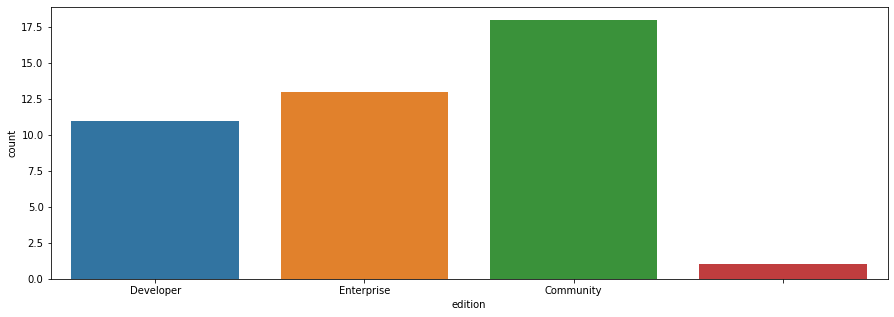

In [178]:
sns.countplot(issues_no_fixing_bug.edition)

In [179]:
for issue_id in issues_no_fixing_bug.issue_name:
    res = git.log("--all", f"--grep='SONAR-{issue_id}'")
    if res != "":
        print(res)

* We confirmed that the issues for which no bug fixing commit was found do not have a commit referencing them using the issue name. They must have been closed manually